#### Cleaning the Dataset and Filtering out Significant Genes

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df = df.rename(columns={'Unnamed: 0': 'Gene'})

In [4]:
df.dropna(inplace=True)

In [5]:
df.sort_values(by='padj', ascending=True, inplace=True) # I set Ascending to 'True' because I want the most likely to be significantly expressed genes to be at the top. They have the smallest p-adj and p-values

In [9]:
df.head()

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-log10pvalue,-log10padj
8787,ENSG00000146918,10299.360858,-3.083064,0.073089,-42.182066,0.0,0.0,inf,inf
9347,ENSG00000151892,3060.072396,-7.472726,0.172893,-43.221612,0.0,0.0,inf,inf
1760,ENSG00000088325,9674.373626,-2.671548,0.069035,-38.698433,0.0,0.0,inf,inf
11696,ENSG00000166508,19002.865645,-3.154208,0.073329,-43.014698,0.0,0.0,inf,inf
8588,ENSG00000145386,2919.382249,-3.568913,0.081657,-43.706241,0.0,0.0,inf,inf


In [6]:
df['-log10pvalue'] = -np.log10(df.pvalue)
df['-log10padj'] = -np.log10(df.padj)

C:\Users\tobij\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\tobij\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
# sgs stands for significant genes, i.e the genes that were differentially expressed
# alpha is the significance value/threshold 
alpha = 0.05
sgs_mask = df['-log10padj'] > -np.log10(alpha)

In [8]:
# I used the adjusted p-values (padj) to filter out the significant genes
sgs = df[sgs_mask].Gene
sgs.head()

8787     ENSG00000146918
9347     ENSG00000151892
1760     ENSG00000088325
11696    ENSG00000166508
8588     ENSG00000145386
Name: Gene, dtype: object

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Fold Change Analysis

In [11]:
# Looking for genes where the expression is double or greater.
# gdge stands for genes with doubled or greater expression
gdge = df[df.log2FoldChange >= 1].Gene

In [12]:
# Filtering out genes where the expression is half or lesser.
# ghle stands for genes with halved or lesser expression
ghle = df[df.log2FoldChange <= -1].Gene

#### Volcano Plot - '-log10padj vs log2FoldChange'

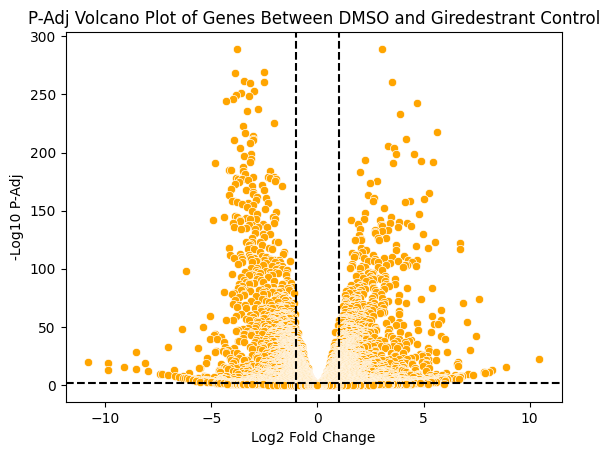

In [13]:
# To see the genes that are both statistically significant and that meaningful expression (either +ve or -ve)
sns.scatterplot(data = df, x='log2FoldChange', y='-log10padj', color='orange')
plt.title('P-Adj Volcano Plot of Genes Between DMSO and Giredestrant Control')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-Adj')
plt.axhline(-np.log10(alpha), linestyle='--', color='black') # All the genes above the horizontal line are significant and differentially expressed
plt.axvline(1, linestyle='--', color='black') # To see the genes whose expression was double or greater (log2foldchange >= 1)
plt.axvline(-1, linestyle='--', color='black') # To see the genes whose expression was half or lesser  (log2foldchange <= -1)
plt.show()

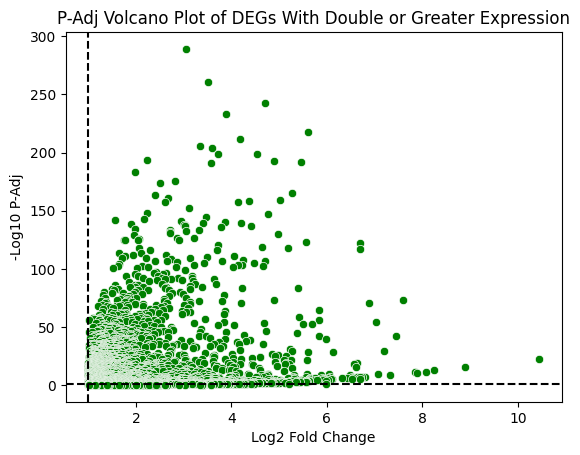

In [14]:
# To see the genes whose expression was double or greater 
sns.scatterplot(data = df[df.Gene.isin(gdge)], x='log2FoldChange', y='-log10padj', color='green')
plt.title('P-Adj Volcano Plot of DEGs With Double or Greater Expression')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-Adj')
plt.axhline(-np.log10(alpha), linestyle='--', color='black')
plt.axvline(1, linestyle='--', color='black') # Expression was doubled or more (log2foldchange >= 1)
plt.show()

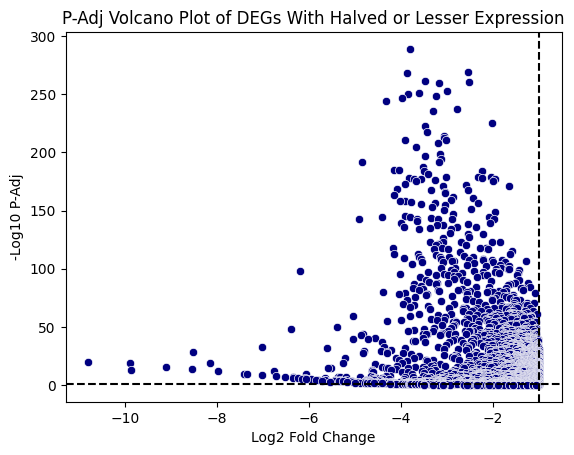

In [15]:
# To see the genes whose expression was half or lesser
sns.scatterplot(data = df[df.Gene.isin(ghle)], x='log2FoldChange', y='-log10padj', color='navy')
plt.title('P-Adj Volcano Plot of DEGs With Halved or Lesser Expression')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-Adj')
plt.axhline(-np.log10(alpha), linestyle='--', color='black')
plt.axvline(-1, linestyle='--', color='black') # Expression was halved or lower  (log2foldchange <= -1)
plt.show()

#### 'Base Mean vs log2FoldChange'

In [16]:
df['log10basemean'] = np.log10(df.baseMean) # To scale the values down so they can be more interpretable

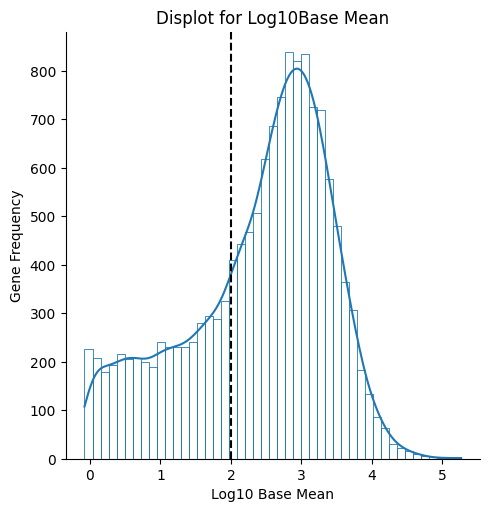

In [17]:
sns.displot(df.log10basemean, kde=True, fill=False)
plt.title('Displot for Log10Base Mean')
plt.xlabel('Log10 Base Mean')
plt.ylabel('Gene Frequency')
plt.axvline(2, linestyle='--', color='black') # The line is the threshold I picked
plt.show()

In [18]:
# Selecting the basemean threshold
basemean_thresh = 2

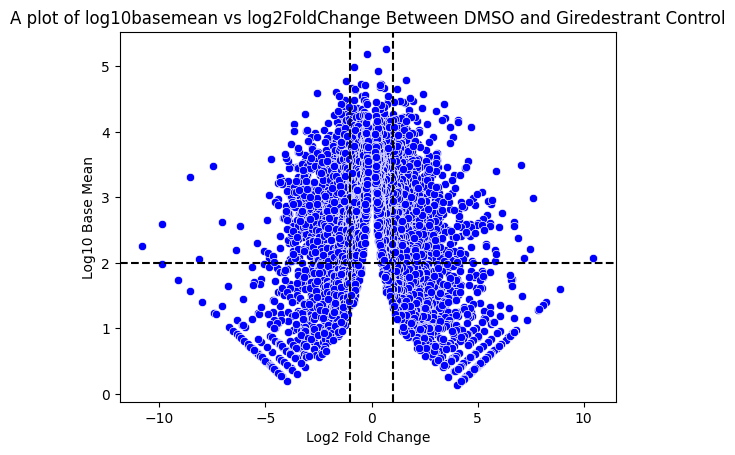

In [19]:
sns.scatterplot(data=df[sgs_mask], x='log2FoldChange', y='log10basemean', color='blue') # The data is for only the significant genes
plt.title('A plot of log10basemean vs log2FoldChange Between DMSO and Giredestrant Control')
plt.xlabel('Log2 Fold Change')
plt.ylabel('Log10 Base Mean')
plt.axhline(basemean_thresh, linestyle='--', color='black') # The genes above the vertical line have avg counts higher than the threshold (across all samples)
plt.axvline(1, linestyle='--', color='black') # Expression was doubled or more (log2foldchange >= 1)
plt.axvline(-1, linestyle='--', color='black') # Expression was halved or lower  (log2foldchange <= -1)
plt.show()

#### 'lfcSE vs log2FoldChange'

In [20]:
df.lfcSE.describe()

count    14284.000000
mean         0.372234
std          0.515416
min          0.056951
25%          0.110466
50%          0.152456
75%          0.340573
max          3.396850
Name: lfcSE, dtype: float64

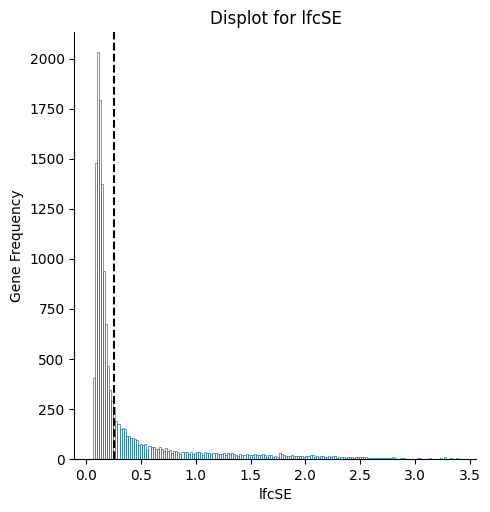

In [21]:
sns.displot(df.lfcSE, fill=False)
plt.title('Displot for lfcSE')
plt.ylabel('Gene Frequency')
plt.axvline(0.25, linestyle='--', color='black') # The line is the threshold I picked
plt.show()

In [22]:
lfcSE_thresh = 0.25

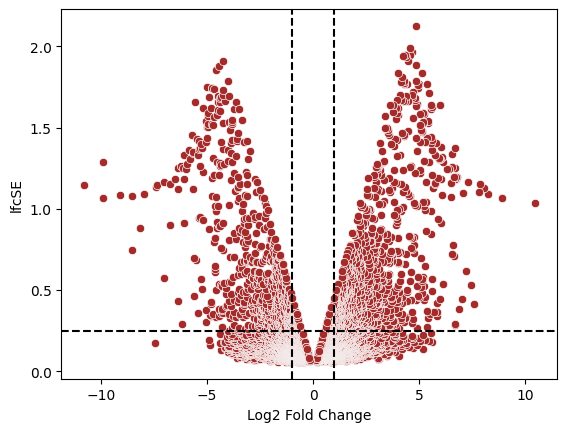

In [23]:
sns.scatterplot(data=df[sgs_mask], x='log2FoldChange', y='lfcSE', color='brown')
plt.xlabel('Log2 Fold Change')
plt.axhline(lfcSE_thresh, linestyle='--', color='black') # The genes below the horizontal line have low variability, i.e the standard error for each of them is low
plt.axvline(1, linestyle='--', color='black') # Expression was doubled or more (log2foldchange >= 1)
plt.axvline(-1, linestyle='--', color='black') # Expression was halved or lower  (log2foldchange <= -1)
plt.show()

In [24]:
# To find genes that have high log2FoldChange and low lfcSE
# lvlfc stands for low variablity, large fold change
# The fold change can be positive or negative, as long as it is substantial
lvlfc = df[(df.lfcSE <= 0.25) & ((df.log2FoldChange >= 1) | (df.log2FoldChange <= -1))]
lvlfc.Gene

8787     ENSG00000146918
9347     ENSG00000151892
1760     ENSG00000088325
11696    ENSG00000166508
8588     ENSG00000145386
              ...       
7891     ENSG00000140545
15289    ENSG00000185261
8644     ENSG00000145819
18210    ENSG00000221909
13468    ENSG00000174721
Name: Gene, Length: 2514, dtype: object

In [25]:
# degwgcie stands for 'Differentially expressed genes with great changes in expression (The changes in expression refer to log2foldchange <= -1 and log2foldchange >= 1)'
degwgcie_df = df[(df.padj < alpha) & ((df.log2FoldChange <= -1) | (df.log2FoldChange >= 1))]

In [26]:
degwgcie_df.head()

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-log10pvalue,-log10padj,log10basemean
8787,ENSG00000146918,10299.360858,-3.083064,0.073089,-42.182066,0.0,0.0,inf,inf,4.012810
9347,ENSG00000151892,3060.072396,-7.472726,0.172893,-43.221612,0.0,0.0,inf,inf,3.485732
1760,ENSG00000088325,9674.373626,-2.671548,0.069035,-38.698433,0.0,0.0,inf,inf,3.985623
11696,ENSG00000166508,19002.865645,-3.154208,0.073329,-43.014698,0.0,0.0,inf,inf,4.278819
8588,ENSG00000145386,2919.382249,-3.568913,0.081657,-43.706241,0.0,0.0,inf,inf,3.465291


In [27]:
controls_data = pd.read_csv('controls.csv')

In [28]:
# The degwgcie_count_df is for all the counts of the differentially expressed genes with great changes in expression
# To make the order of genes in the new degwgcie_count_df the same as degwgcie_df
degwgcie_count_df = controls_data[controls_data.name.isin(degwgcie_df.Gene)]
degwgcie_count_df = degwgcie_count_df.set_index('name').loc[degwgcie_df.Gene] # Basically getting (in order) the names of the genes of the smaller degwgcie_df in the larger degwgcie_count_df and arranging the degwgcie_count_df with them

In [29]:
degwgcie_count_df # The indices may have changed, but the genes are in the correct order, arranged from the one with the lowest p-adj to the one with the highest in this dataframe

,dmso_control_1,dmso_control_2,dmso_control_3,dmso_control_4,giredestrant_control_1,giredestrant_control_2,giredestrant_control_3,giredestrant_control_4
name,,,,,,,,
ENSG00000146918,15668,21108,25583,19544,1794,2076,2125,2068
ENSG00000151892,6273,6649,7332,6331,22,21,41,44
ENSG00000088325,14716,19534,20951,18637,2191,2270,2510,2789
ENSG00000166508,28386,39677,44876,38684,3251,3617,3784,3569
ENSG00000145386,4393,6148,7370,6055,367,421,453,445
...,...,...,...,...,...,...,...,...
ENSG00000156500,18,10,15,13,6,5,3,4
ENSG00000107551,0,3,1,4,1,9,13,9
ENSG00000105519,4,19,27,16,24,14,46,30


In [33]:
# Normalizing all the counts with log2(x + 1) to stabilise the variance and make interpretation of the upcoming heatmap easy
normalized = degwgcie_count_df.apply(lambda x: np.log2(x + 1))

In [34]:
normalized.head()

,dmso_control_1,dmso_control_2,dmso_control_3,dmso_control_4,giredestrant_control_1,giredestrant_control_2,giredestrant_control_3,giredestrant_control_4
name,,,,,,,,
ENSG00000146918,13.935625,14.365571,14.642954,14.254512,10.809768,11.020286,11.053926,11.014718
ENSG00000151892,12.615170,12.699139,12.840188,12.628446,4.523562,4.459432,5.392317,5.491853
ENSG00000088325,13.845196,14.253774,14.354800,14.185959,11.098032,11.149112,11.294046,11.446049
ENSG00000166508,14.792943,15.276052,15.453689,15.239487,11.667112,11.820977,11.886078,11.801708
ENSG00000145386,12.101319,12.586136,12.847645,12.564149,8.523562,8.721099,8.826548,8.800900


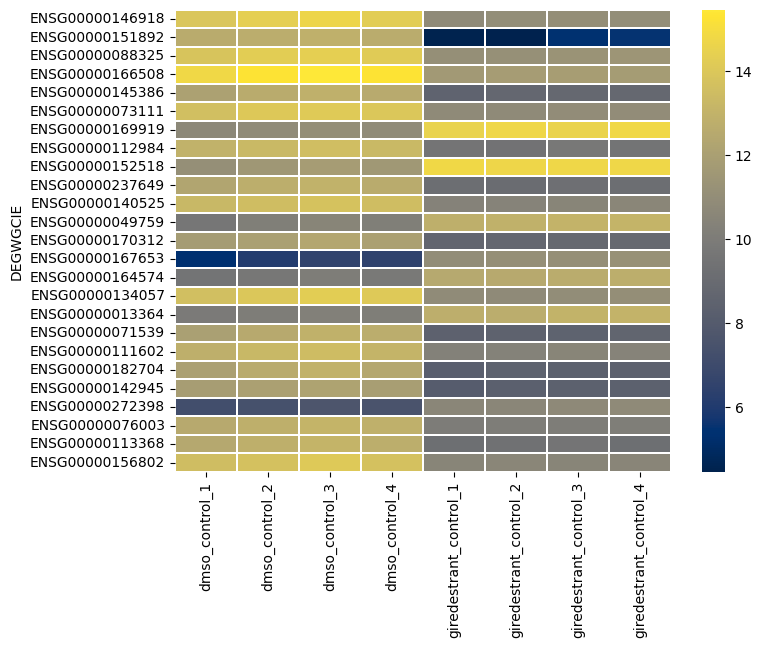

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(normalized.iloc[:25], annot=False, cmap='cividis', linewidths=.01) # To visualise expression in the topmost 25 degwgcie in the dataframe
plt.ylabel('DEGWGCIE')
plt.show()